# Exercise 1: Decision Tree And Random Forest Implementation on Breast Cancer Dataset

In this exercise we will going to build Decisition Tree and Random Forest on Breast Cancer dataset via on Sklearn

In [1]:
import pandas as pd
import numpy as np

## Import dataset
We will use the dataset Breast Cancer from sklearn

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset=load_breast_cancer()

Overview about the dataset

In [4]:
# List dataset keys
print("Data keys: ", dataset.keys())

Data keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# Data shape
print("Data shape: ", dataset.data.shape)

Data shape:  (569, 30)


In [6]:
# List features
print("Number of features: ", len(dataset.feature_names))

print("List features: ", dataset.feature_names)

Number of features:  30
List features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# List tagert features
print("Number of features: ", len(dataset.target_names))

print("List features: ", dataset.target_names)

Number of features:  2
List features:  ['malignant' 'benign']


## Split train test datasets

** We will split the origin dataset to 2 dataset is train and test **
- Split dataset:
    - Train dataset: 80%
    - Test dataset: 20%

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = dataset.data
y = dataset.target
# Split dataset with the ratio train:test = 8:2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Train shape and test shape
print("Train shape", x_train.shape)
print("Test shape", x_test.shape)

Train shape (455, 30)
Test shape (114, 30)


## I. Build and train model Decision Tree using Sklearn

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [12]:
# Define DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier(max_depth=2,random_state=42)
# model_decision_tree = DecisionTreeClassifier(max_depth=4,random_state=42)
# model_decision_tree = DecisionTreeClassifier(random_state=42)

In [13]:
# Fit data train
model_decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
# Predict using data train
y_train_predict = model_decision_tree.predict(x_train)
# Calulate the accuracy on data train
print('Accuracy score on data train: ', accuracy_score(y_train_predict, y_train))

Accuracy score on data train:  0.9582417582417583


In [15]:
# Calulate the accuracy on data train
print('Accuracy score on data train: ', model_decision_tree.score(x_test, y_test))

Accuracy score on data train:  0.8947368421052632


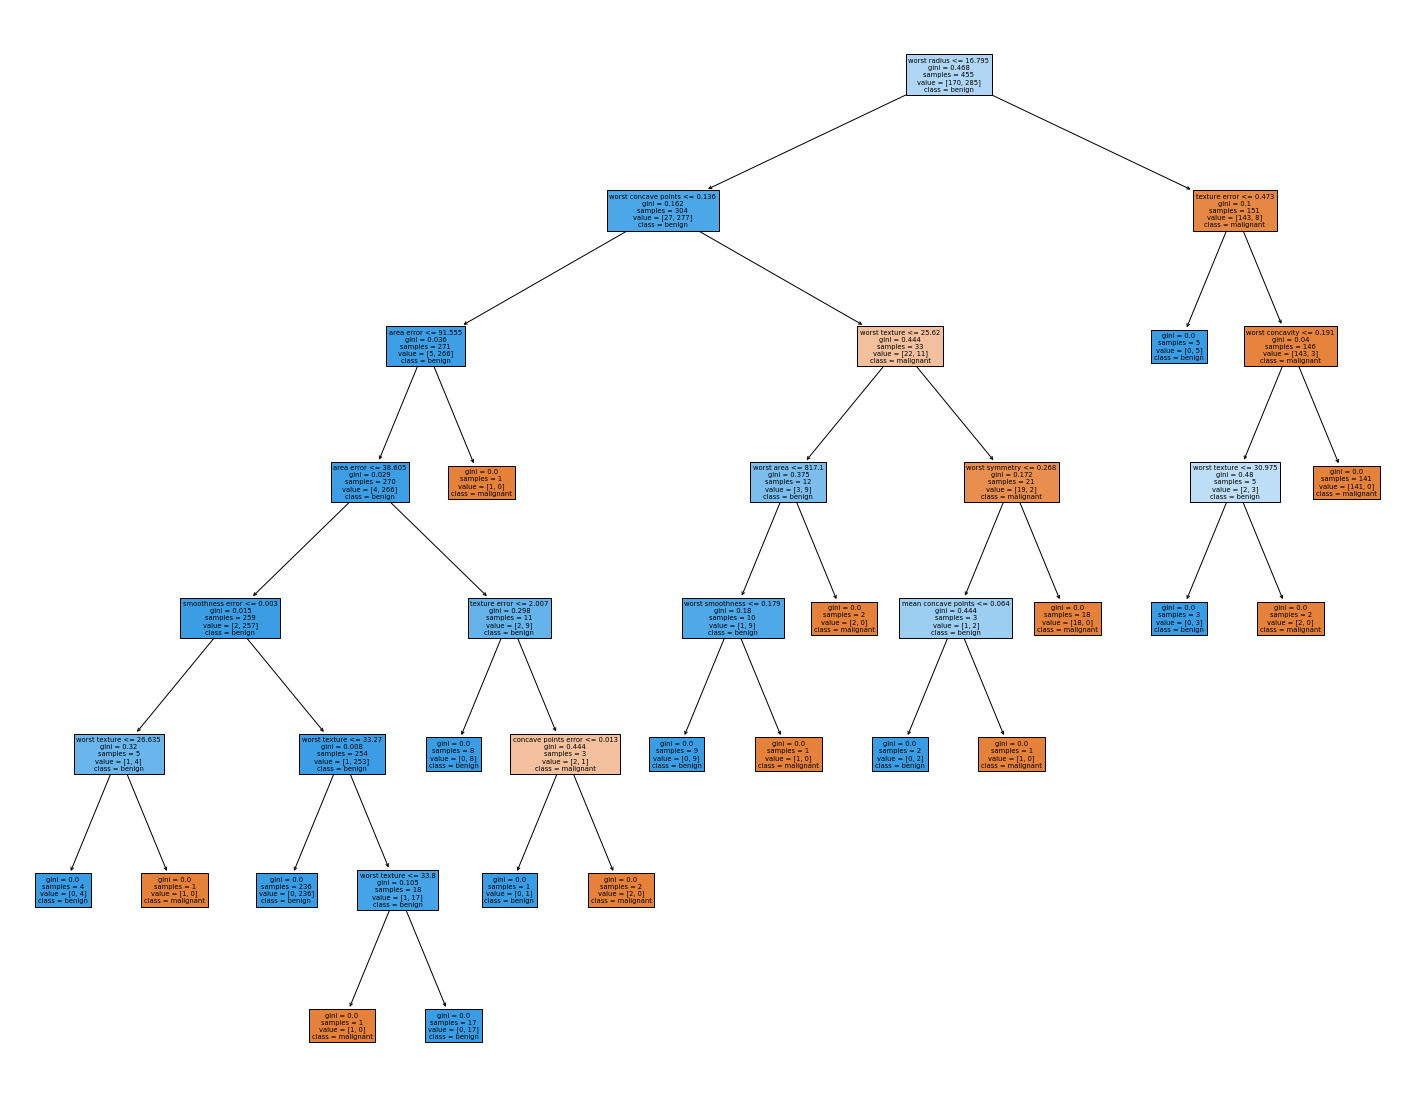

In [24]:
# Visualize our tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(model_decision_tree, 
                   feature_names = dataset.feature_names,  
                   class_names = dataset.target_names,
                   filled = True)

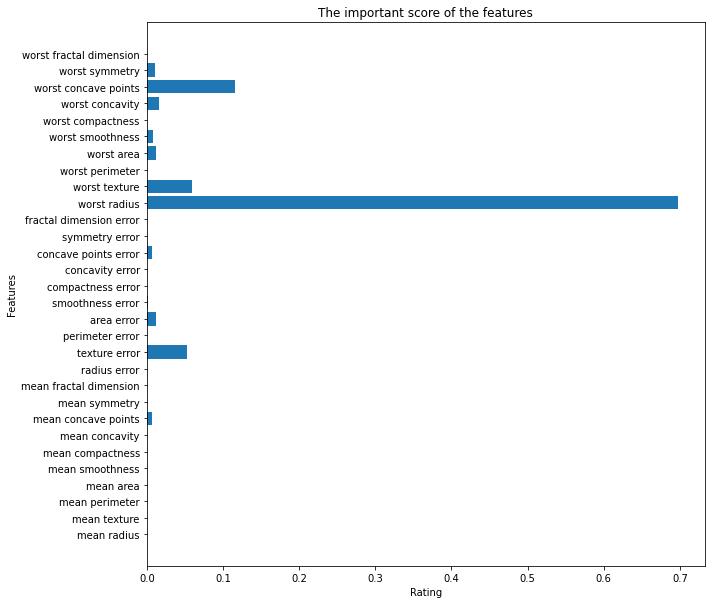

In [26]:
# Importance of features
import_features_score = model_decision_tree.feature_importances_

# Visualize 
features = dataset.feature_names
n = len(features)
plt.figure(figsize = (10,10))
plt.barh(range(n), import_features_score)
plt.yticks(range(n),features)
plt.title('The important score of the features')
plt.ylabel('Features')
plt.xlabel('Rating')
plt.show()


## II. Build and train model Random Forest using Sklearn

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [28]:
# Define Random Forest model
# model_random_forest = RandomForestRegressor(max_depth=2, random_state=42)
model_random_forest = RandomForestClassifier(n_estimators=5, max_depth=4, random_state=42)
# model_random_forest = RandomForestRegressor(random_state=42)

In [29]:
# Fit data train
model_random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=5, random_state=42)

In [30]:
# Calulate the accuracy on data train
print('Accuracy score on data train: ', model_random_forest.score(x_train, y_train))

# Calulate the accuracy on data test
print('Accuracy score on data test: ', model_random_forest.score(x_test, y_test))

Accuracy score on data train:  0.9824175824175824
Accuracy score on data test:  0.9473684210526315


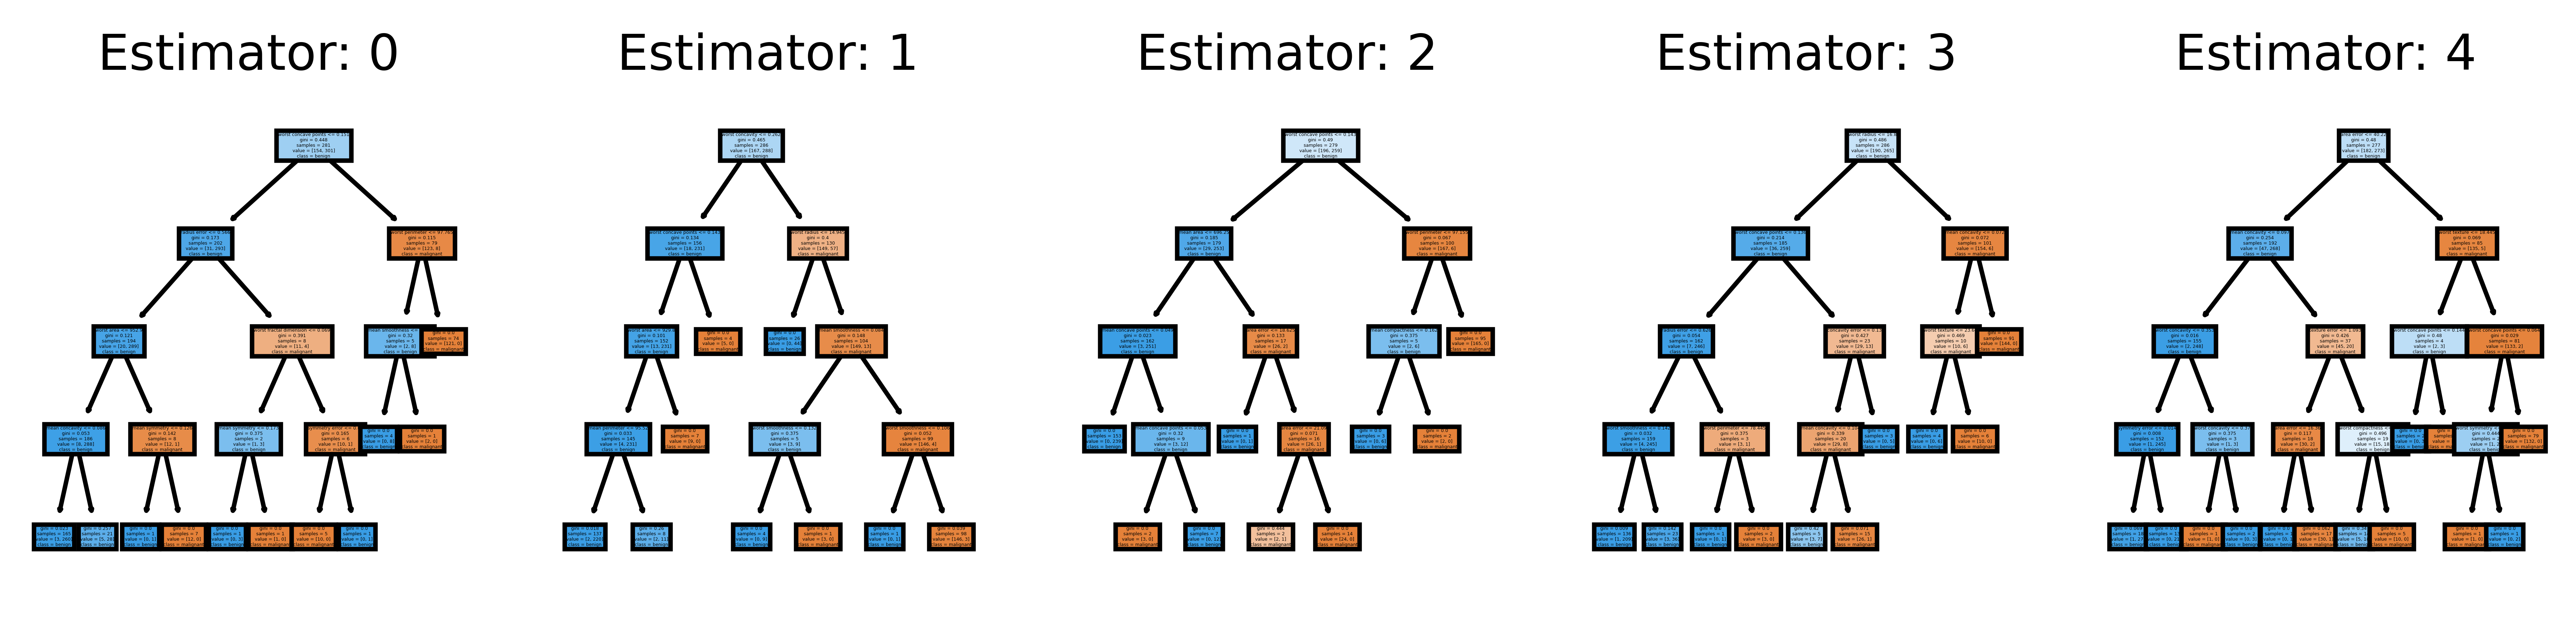

In [31]:
# Visualize our forest
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model_random_forest.estimators_[index],
                   feature_names = dataset.feature_names, 
                   class_names = dataset.target_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

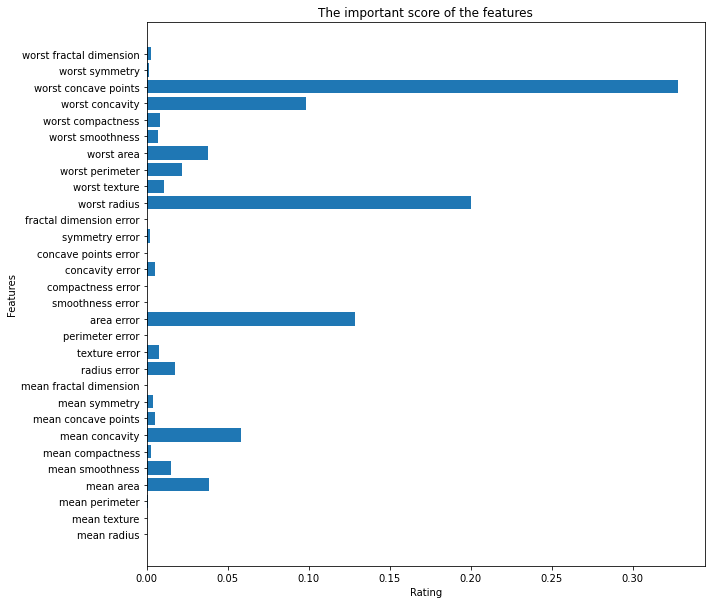

In [32]:
# Importance of features
import_features_score= model_random_forest.feature_importances_

# Visualize 
features = dataset.feature_names
n = len(features)
plt.figure(figsize = (10,10))
plt.barh(range(n), import_features_score)
plt.yticks(range(n),features)
plt.title('The important score of the features')
plt.ylabel('Features')
plt.xlabel('Rating')
plt.show()